Projekt data mining:

Spis treści (dodamy później).

Wstęp:
We wstępie skupimy się na wskazaniu celu pracy, zarówno biznesowym jak i celem data mining. Zostanie również wskazany zakres pracy oraz o źródle danych.

W naszym projekcie korzystam ze zbioru danych TheLook eCommerce, który jest publicznie dostępny na platformie Google Cloud. Zbiór ten symuluje działanie rzeczywistego sklepu internetowego, dostarczając szczegółowe informacje niezbędne do analizy zachowań klientów i optymalizacji procesów biznesowych.

Wstęp:
We wstępie skupimy się na wskazaniu celu pracy, zarówno biznesowym jak i celem data mining. Zostanie również wskazany zakres pracy oraz o źródle danych.

W naszym projekcie korzystam ze zbioru danych TheLook eCommerce, który jest publicznie dostępny na platformie Google Cloud. Zbiór ten symuluje działanie rzeczywistego sklepu internetowego, dostarczając szczegółowe informacje niezbędne do analizy zachowań klientów i optymalizacji procesów biznesowych.

Opis Zbioru Danych
TheLook eCommerce zawiera szeroki zakres danych, obejmujących różne aspekty funkcjonowania sklepu internetowego:

Historia Zamówień: Zawiera dane o zamówieniach składanych przez klientów, takie jak identyfikator zamówienia, data złożenia zamówienia, liczba zamówionych produktów, wartość zamówienia oraz status zamówienia (np. zrealizowane, zwrócone).
Dane Klientów: Obejmuje informacje demograficzne, w tym identyfikator klienta, wiek, płeć, lokalizacja geograficzna oraz historia zakupów i zwrotów.
Dane Produktów: Zawiera szczegóły dotyczące produktów oferowanych w sklepie, w tym identyfikator produktu, kategorię, cenę, dostępność oraz specyficzne cechy produktów (np. rozmiar, kolor).
Zwroty: Przechowuje informacje o zwróconych zamówieniach, w tym przyczyny zwrotów, daty zwrotów oraz warunki zwrotów (np. stan zwróconego produktu).
Wartość Zbioru Danych
Zbiór danych TheLook eCommerce jest niezwykle wartościowy dla analityków i specjalistów ds. data science. Pozwala na:

Analizę Zachowań Klientów: Dzięki szczegółowym danym mogę zrozumieć wzorce zakupowe klientów, zidentyfikować kluczowe segmenty klientów i przeanalizować przyczyny zwrotów.
Optymalizację Działań Marketingowych: Dane umożliwiają personalizację ofert marketingowych, precyzyjne targetowanie reklam oraz prognozowanie sprzedaży.
Poprawę Logistyki i Obsługi Klienta: Dzięki analizie danych mogę optymalizować procesy logistyczne, zarządzać zapasami i doskonalić politykę zwrotów.
Dzięki wysokiej jakości i szczegółowości danych, zbiór TheLook eCommerce stanowi solidną podstawę do budowy modeli predykcyjnych i eksploracji danych, co w efekcie przyczynia się do podejmowania bardziej świadomych i efektywnych decyzji biznesowych.

Cel projektu: 

Cel Biznesowy
Zmniejszenie ryzyka zwrotów zamówień oraz optymalizacja działań marketingowych i logistycznych:
Celem biznesowym jest redukcja liczby zwrotów poprzez lepsze zrozumienie, które segmenty klientów są bardziej skłonne do zwrotów. To pozwoli na dostosowanie strategii marketingowych oraz poprawę procesów obsługi klienta i logistyki. W rezultacie sklep będzie mógł zredukować koszty związane ze zwrotami i poprawić doświadczenia zakupowe klientów.

Cel Data Mining
Opracowanie predykcyjnego modelu scoringowego:
Głównym celem data mining jest stworzenie modelu predykcyjnego, który przydzieli każdemu klientowi wynik zwrotu, określający prawdopodobieństwo, że dany klient zwróci lub usunie swoje zamówienie (w naszym przypadku tych klientów traktujemy tak samo, ponieważ obciążają oni logistykę i narażają przedsiębiorswto na straty). Model ten będzie oparty na analizie danych historycznych, takich jak historia zakupów, demografia klientów oraz dane dotyczące zwrotów.

Wstępne przetwarzanie danych

In [1]:
# Do wczytywania, zapisywania, filtrowania i modyfikowania zbiorów danych służy biblioteka PANDAS 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [57]:
#Wczytanie tabeli klientów
customers = pd.read_csv('/home/jovyan/notebooks/projekt_data_mining/users.csv')
customers.shape

(45510, 15)

In [58]:
#Wczytanie tabeli zamówień
orders = pd.read_csv('/home/jovyan/notebooks/projekt_data_mining/orders.csv')
orders.shape
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,8,Cancelled,F,2022-03-06 04:31:00.000000 UTC,NaN,NaN,NaN,1
1,44,35,Cancelled,F,2024-03-29 07:36:00.000000 UTC,NaN,NaN,NaN,2
2,45,37,Cancelled,F,2021-12-14 10:21:00.000000 UTC,NaN,NaN,NaN,1
3,51,45,Cancelled,F,2024-01-13 13:38:00.000000 UTC,NaN,NaN,NaN,1
4,53,47,Cancelled,F,2019-10-30 03:23:00.000000 UTC,NaN,NaN,NaN,1


In [59]:
#Wczytanie tabeli produktów w zamówieniach
order_items = pd.read_csv('/home/jovyan/notebooks/projekt_data_mining/order_items.csv')
order_items.shape

(63937, 11)

In [51]:
#Połączenie tabeli orders with order_items
import pandas as pd

# Define columns to keep
columns_to_keep = [
    'order_id', 'user_id', 'status', 'gender', 'created_at', 
    'returned_at', 'shipped_at', 'delivered_at', 'num_of_item'
]

# Merge the datasets and specify suffixes to handle overlapping column names
merged_df = pd.merge(orders, order_items, on='order_id', how='left', suffixes=('_order', '_item'))

# Select and rename the required columns
selected_columns = [
    'order_id', 'user_id_order', 'status_order', 'gender', 'created_at_order', 
    'returned_at_order', 'shipped_at_order', 'delivered_at_order', 'num_of_item', 'sale_price'
]

merged_df = merged_df[selected_columns]

# Rename columns to match the original names
merged_df.columns = [
    'order_id', 'user_id', 'status', 'gender', 'created_at', 
    'returned_at', 'shipped_at', 'delivered_at', 'num_of_item', 'sale_price'
]

# Ensure no NaN values in the columns used for grouping
merged_df[columns_to_keep] = merged_df[columns_to_keep].fillna('')

# Aggregate the data
final_df = merged_df.groupby(columns_to_keep).agg(
    num_of_items=('order_id', 'size'),
    total_sales=('sale_price', 'sum')
).reset_index()

# Display the final dataframe
final_df = final_df.drop(columns=['num_of_items'])
final_df

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,total_sales
0,1,1,Processing,F,2024-05-20 10:31:00.000000 UTC,,,,3,37.94
1,2,1,Shipped,F,2022-10-17 10:31:00.000000 UTC,,2022-10-18 16:35:00.000000 UTC,,1,0.00
2,3,3,Complete,M,2021-05-08 05:55:00.000000 UTC,,2021-05-08 18:25:00.000000 UTC,2021-05-10 19:14:00.000000 UTC,1,0.00
3,4,5,Complete,M,2020-01-22 08:31:00.000000 UTC,,2020-01-25 04:49:00.000000 UTC,2020-01-26 23:36:00.000000 UTC,1,0.00
4,5,6,Complete,M,2024-01-23 17:40:00.000000 UTC,,2024-01-23 19:49:00.000000 UTC,2024-01-24 21:52:00.000000 UTC,1,0.00
...,...,...,...,...,...,...,...,...,...,...
82340,124576,99994,Shipped,F,2024-05-24 04:19:00.000000 UTC,,2024-05-26 14:32:00.000000 UTC,,1,11.81
82341,124577,99994,Complete,F,2020-08-28 04:19:00.000000 UTC,,2020-08-28 14:57:00.000000 UTC,2020-08-31 04:58:00.000000 UTC,1,0.00
82342,124578,99995,Complete,F,2021-08-13 05:05:00.000000 UTC,,2021-08-14 04:55:00.000000 UTC,2021-08-18 13:33:00.000000 UTC,1,25.00
82343,124580,99997,Complete,F,2024-04-17 16:56:00.000000 UTC,,2024-04-18 08:44:00.000000 UTC,2024-04-18 21:41:00.000000 UTC,1,10.00


In [55]:
#Jeżeli wartość transakcji jest 0 to wykluczamy ją
final_df['is_zero_transaction'] = final_df['total_sales'] == 0
final_df

filtered_df = final_df[final_df['is_zero_transaction'] == False]

# Drop the is_zero_transaction column as it is no longer needed
filtered_df = filtered_df.drop(columns=['is_zero_transaction'])
filtered_df

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,total_sales
0,1,1,Processing,F,2024-05-20 10:31:00.000000 UTC,,,,3,37.940000
5,8,8,Cancelled,F,2022-03-06 04:31:00.000000 UTC,,,,1,22.500000
6,11,12,Complete,F,2023-09-27 11:33:00.000000 UTC,,2023-09-27 20:53:00.000000 UTC,2023-10-02 20:34:00.000000 UTC,1,21.990000
8,13,12,Shipped,F,2024-03-20 11:33:00.000000 UTC,,2024-03-21 16:57:00.000000 UTC,,3,26.990000
10,17,18,Shipped,F,2023-07-16 09:20:00.000000 UTC,,2023-07-17 07:45:00.000000 UTC,,1,24.000000
...,...,...,...,...,...,...,...,...,...,...
82336,124567,99984,Complete,F,2024-02-09 08:00:00.000000 UTC,,2024-02-10 18:51:00.000000 UTC,2024-02-12 19:53:00.000000 UTC,1,13.880000
82339,124575,99993,Shipped,F,2021-01-04 09:25:00.000000 UTC,,2021-01-05 16:56:00.000000 UTC,,1,16.379999
82340,124576,99994,Shipped,F,2024-05-24 04:19:00.000000 UTC,,2024-05-26 14:32:00.000000 UTC,,1,11.810000
82342,124578,99995,Complete,F,2021-08-13 05:05:00.000000 UTC,,2021-08-14 04:55:00.000000 UTC,2021-08-18 13:33:00.000000 UTC,1,25.000000


In [61]:
#Dołączamy zamówienia do klientów
merged_users_with_orders = pd.merge(customers, filtered_df, left_on='id', right_on='user_id', how='left')

# Select relevant columns to keep
final_columns = [
    'id', 'first_name', 'last_name', 'email', 'age', 'gender_x', 'state', 'street_address', 
    'postal_code', 'city', 'country', 'traffic_source', 'order_id', 'status', 'created_at_x', 
    'returned_at', 'shipped_at', 'delivered_at', 'num_of_item', 'total_sales'
]

merged_users_with_orders = merged_users_with_orders[final_columns]

# Rename columns to be more readable
merged_users_with_orders.columns = [
    'user_id', 'first_name', 'last_name', 'email', 'age', 'gender', 'state', 'street_address', 
    'postal_code', 'city', 'country', 'traffic_source', 'order_id', 'status', 'created_at', 
    'returned_at', 'shipped_at', 'delivered_at', 'num_of_item', 'total_sales'
]
merged_users_with_orders

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,traffic_source,order_id,status,created_at,returned_at,shipped_at,delivered_at,num_of_item,total_sales
0,2606,Corey,Perry,coreyperry@example.net,62,M,Acre,99607 Koch Passage Suite 229,69917-400,Rio Branco,Brasil,Search,3265.0,Cancelled,2022-07-30 14:01:00.000000 UTC,,,,1.0,25.00
1,21490,Joel,Mitchell,joelmitchell@example.net,60,M,Acre,69711 Smith Isle,69917-400,Rio Branco,Brasil,Organic,NaN,NaN,2024-04-09 09:20:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
2,31831,Michael,Donaldson,michaeldonaldson@example.org,65,M,Acre,75483 Potter Hills Apt. 922,69917-400,Rio Branco,Brasil,Search,NaN,NaN,2021-04-19 16:44:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
3,56540,Samantha,Cook,samanthacook@example.org,62,F,Acre,40572 Davis Square,69917-400,Rio Branco,Brasil,Search,70743.0,Cancelled,2023-12-30 09:03:00.000000 UTC,,,,1.0,12.00
4,60386,Amanda,Dunlap,amandadunlap@example.org,14,F,Acre,871 Wilson Vista,69917-400,Rio Branco,Brasil,Search,NaN,NaN,2020-03-05 09:10:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48569,88149,Scott,Nolan,scottnolan@example.net,12,M,Hunan,730 Christopher Tunnel Suite 690,416000,Suzhou,China,Organic,NaN,NaN,2023-03-23 14:23:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
48570,89763,Sean,Watson,seanwatson@example.com,50,M,Hunan,59775 Owens Squares,416000,Suzhou,China,Display,NaN,NaN,2020-06-12 02:18:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
48571,89769,Amy,Craig,amycraig@example.com,59,F,Hunan,1634 Steven Park Suite 125,416000,Suzhou,China,Organic,NaN,NaN,2020-02-23 17:28:00.000000 UTC,NaN,NaN,NaN,NaN,NaN
48572,90871,Wendy,Mitchell,wendymitchell@example.net,41,F,Hunan,8542 Sarah Summit Apt. 824,416000,Suzhou,China,Search,113334.0,Returned,2019-05-23 01:32:00.000000 UTC,2021-03-18 17:56:00.000000 UTC,2021-03-14 14:00:00.000000 UTC,2021-03-15 20:02:00.000000 UTC,1.0,26.00


In [63]:
#Sprawdzamy czy jeden klient ma więcej niż jedno zamówienie
users_with_multiple_orders = merged_users_with_orders.groupby('user_id').size().reset_index(name='counts')
users_with_multiple_orders = users_with_multiple_orders[users_with_multiple_orders['counts'] > 1]
users_with_multiple_orders

,user_id,counts
7,18,2
22,48,2
38,85,2
57,122,2
60,131,3
...,...,...
45447,99873,2
45448,99875,2
45468,99918,2
45495,99966,2


In [69]:
grouped_users = merged_users_with_orders.groupby('user_id').agg(
    first_name=('first_name', 'first'),
    last_name=('last_name', 'first'),
    email=('email', 'first'),
    age=('age', 'first'),
    gender=('gender', 'first'),
    state=('state', 'first'),
    street_address=('street_address', 'first'),
    postal_code=('postal_code', 'first'),
    city=('city', 'first'),
    country=('country', 'first'),
    traffic_source=('traffic_source', 'first'),
    status=('status', lambda x: 1 if any(status in ['Cancelled', 'Returned'] for status in x) else 0),
    avg_num_of_item=('num_of_item', 'mean'),
    avg_total_sales=('total_sales', 'mean')
)
grouped_users

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,traffic_source,status,avg_num_of_item,avg_total_sales
user_id,,,,,,,,,,,,,,
1,Robin,Garrett,robingarrett@example.com,60,F,England,351 Simon Landing,L9,Liverpool,United Kingdom,Facebook,0,3.0,37.940000
4,Marcus,Haynes,marcushaynes@example.net,58,M,Guangdong,817 Monroe Run,510499,Harbin,China,Search,0,NaN,NaN
6,George,Martinez,georgemartinez@example.org,64,M,England,2686 Hernandez Alley Apt. 263,GU2,Guildford,United Kingdom,Search,0,NaN,NaN
8,Kimberly,Hawkins,kimberlyhawkins@example.net,62,F,Guangdong,721 Smith Trail,518114,Dandong,China,Search,1,1.0,22.500000
10,Melissa,Hansen,melissahansen@example.net,60,F,Chongqing,0583 Cody Creek Apt. 009,401147,Shanghai,China,Search,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,Samuel,Murphy,samuelmurphy@example.org,34,M,Georgia,948 Dixon Ranch Apt. 210,30041,Cumming,United States,Search,0,NaN,NaN
99988,John,Garza,johngarza@example.net,20,M,England,2177 Spencer Tunnel,OL11,Rochdale,United Kingdom,Organic,0,NaN,NaN
99993,Anne,Brown,annebrown@example.net,60,F,Baden-Württemberg,31169 Larry Parkway Apt. 413,72160,Horb am Neckar,Germany,Search,0,1.0,16.379999


Braki danych
W naszym przypadku interesują nas tylko klienci którzy mieli jakieklwiek zamówienie. Jeżeli wartość avg_total_sales jest nieznana to usuwamy takiego klienta z analizy

In [71]:
filtered_grouped_users = grouped_users.dropna(subset=['avg_total_sales'])
filtered_grouped_users

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,traffic_source,status,avg_num_of_item,avg_total_sales
user_id,,,,,,,,,,,,,,
1,Robin,Garrett,robingarrett@example.com,60,F,England,351 Simon Landing,L9,Liverpool,United Kingdom,Facebook,0,3.0,37.940000
8,Kimberly,Hawkins,kimberlyhawkins@example.net,62,F,Guangdong,721 Smith Trail,518114,Dandong,China,Search,1,1.0,22.500000
18,Susan,Dominguez,susandominguez@example.org,30,F,Connecticut,973 Santos Groves Apt. 414,6708,Waterbury,United States,Search,0,1.0,26.000000
20,David,Watson,davidwatson@example.org,35,M,Bahia,917 Fuller Forges,46400-000,Caetité,Brasil,Search,0,1.0,15.000000
28,Donna,Vazquez,donnavazquez@example.com,69,F,Baden-Württemberg,2643 Reed Shores,70378,Stuttgart,Germany,Email,0,4.0,30.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99972,Steve,Wilson,stevewilson@example.org,17,M,England,36049 Cassandra Groves Apt. 548,SE16,London,United Kingdom,Search,1,2.0,22.000000
99980,Leslie,Villanueva,leslievillanueva@example.com,44,F,England,458 Maria Walk,LS8,Leeds,United Kingdom,Search,0,1.0,21.000000
99981,Megan,Mccarty,meganmccarty@example.org,33,F,California,0512 Saunders Villages,92679,Coto de Caza,United States,Organic,1,1.5,23.950001


In [73]:
#Sprawdzamy ilu użytkowników kiedykolwiek zwróciło zamówienie
status_counts = filtered_grouped_users['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']
status_counts

,status,count
0,0,9501
1,1,4819


In [75]:
#Zmieńmy teraz nazwe kolumny status na is_returned_or_cancelled
filtered_grouped_users.rename(columns={'status': 'is_returned_or_cancelled'}, inplace=True)
filtered_grouped_users

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,traffic_source,is_returned_or_cancelled,avg_num_of_item,avg_total_sales
user_id,,,,,,,,,,,,,,
1,Robin,Garrett,robingarrett@example.com,60,F,England,351 Simon Landing,L9,Liverpool,United Kingdom,Facebook,0,3.0,37.940000
8,Kimberly,Hawkins,kimberlyhawkins@example.net,62,F,Guangdong,721 Smith Trail,518114,Dandong,China,Search,1,1.0,22.500000
18,Susan,Dominguez,susandominguez@example.org,30,F,Connecticut,973 Santos Groves Apt. 414,6708,Waterbury,United States,Search,0,1.0,26.000000
20,David,Watson,davidwatson@example.org,35,M,Bahia,917 Fuller Forges,46400-000,Caetité,Brasil,Search,0,1.0,15.000000
28,Donna,Vazquez,donnavazquez@example.com,69,F,Baden-Württemberg,2643 Reed Shores,70378,Stuttgart,Germany,Email,0,4.0,30.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99972,Steve,Wilson,stevewilson@example.org,17,M,England,36049 Cassandra Groves Apt. 548,SE16,London,United Kingdom,Search,1,2.0,22.000000
99980,Leslie,Villanueva,leslievillanueva@example.com,44,F,England,458 Maria Walk,LS8,Leeds,United Kingdom,Search,0,1.0,21.000000
99981,Megan,Mccarty,meganmccarty@example.org,33,F,California,0512 Saunders Villages,92679,Coto de Caza,United States,Organic,1,1.5,23.950001


In [76]:
# Podstawowe statystyki dla zmiennych ciągłych
filtered_grouped_users.describe()

,age,is_returned_or_cancelled,avg_num_of_item,avg_total_sales
count,14320.000000,14320.000000,14320.000000,14320.000000
mean,41.231075,0.336522,1.708112,21.473323
std,17.138941,0.472536,0.919445,10.381407
min,12.000000,0.000000,1.000000,0.020000
25%,26.000000,0.000000,1.000000,13.995000
50%,42.000000,0.000000,1.000000,20.000000
75%,56.000000,1.000000,2.000000,25.412500
max,70.000000,1.000000,4.000000,90.990000


In [77]:
filtered_grouped_users['age'].describe()

count    14320.000000
mean        41.231075
std         17.138941
min         12.000000
25%         26.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: age, dtype: float64

In [78]:
filtered_grouped_users['age'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    14.0
0.25    26.0
0.50    42.0
0.75    56.0
0.95    68.0
Name: age, dtype: float64

In [79]:
filtered_grouped_users.skew() 

age                        -0.012119
is_returned_or_cancelled    0.692012
avg_num_of_item             1.239586
avg_total_sales             1.379782
dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'is_returned_or_cancelled'}>],
       [<Axes: title={'center': 'avg_num_of_item'}>,
        <Axes: title={'center': 'avg_total_sales'}>]], dtype=object)

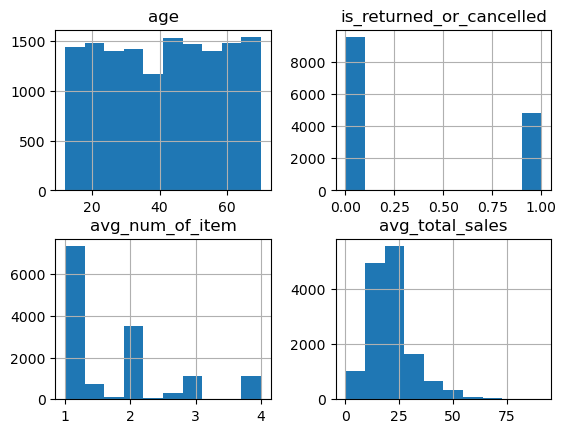

In [80]:
# Histogramy
filtered_grouped_users.hist(bins=10)

Text(0, 0.5, 'Liczebności')

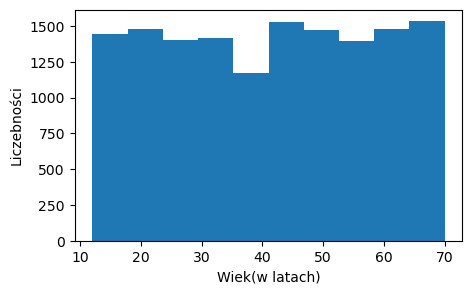

In [82]:
# Histogram z opisem dla jednej zmiennej
ax = (filtered_grouped_users['age']).plot.hist(figsize=(5,3))
ax.set_xlabel('Wiek(w latach)')
ax.set_ylabel('Liczebności')

In [85]:
#Utworzenie przedziałów dla zmiennej avg_total_sales
podz_avg_total_sales = pd.cut(filtered_grouped_users['avg_total_sales'], 20)
podz_avg_total_sales.value_counts() 

(22.762, 27.311]    3217
(13.665, 18.214]    2555
(9.117, 13.665]     2379
(18.214, 22.762]    2334
(27.311, 31.859]    1281
(4.568, 9.117]       898
(31.859, 36.408]     379
(36.408, 40.956]     377
(40.956, 45.505]     284
(45.505, 50.053]     215
(50.053, 54.602]     119
(-0.071, 4.568]      115
(54.602, 59.15]       64
(59.15, 63.699]       36
(68.247, 72.796]      22
(63.699, 68.247]      18
(72.796, 77.344]      15
(77.344, 81.893]       8
(81.893, 86.441]       2
(86.441, 90.99]        2
Name: avg_total_sales, dtype: int64

In [87]:
# Identyfikacja zmiennych z brakami danych
filtered_grouped_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14320 entries, 1 to 99997
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   first_name                14320 non-null  object 
 1   last_name                 14320 non-null  object 
 2   email                     14320 non-null  object 
 3   age                       14320 non-null  int64  
 4   gender                    14320 non-null  object 
 5   state                     14320 non-null  object 
 6   street_address            14320 non-null  object 
 7   postal_code               14320 non-null  object 
 8   city                      14173 non-null  object 
 9   country                   14320 non-null  object 
 10  traffic_source            14320 non-null  object 
 11  is_returned_or_cancelled  14320 non-null  int64  
 12  avg_num_of_item           14320 non-null  float64
 13  avg_total_sales           14320 non-null  float64
dtypes: flo

In [88]:
# Wydruk całego zbioru danych, obserwacje zawierające braki danych oznaczane są jako "True"
filtered_grouped_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14320 entries, 1 to 99997
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   first_name                14320 non-null  object 
 1   last_name                 14320 non-null  object 
 2   email                     14320 non-null  object 
 3   age                       14320 non-null  int64  
 4   gender                    14320 non-null  object 
 5   state                     14320 non-null  object 
 6   street_address            14320 non-null  object 
 7   postal_code               14320 non-null  object 
 8   city                      14173 non-null  object 
 9   country                   14320 non-null  object 
 10  traffic_source            14320 non-null  object 
 11  is_returned_or_cancelled  14320 non-null  int64  
 12  avg_num_of_item           14320 non-null  float64
 13  avg_total_sales           14320 non-null  float64
dtypes: flo

WYKORZYSTUJEMY DALEJ TEN DATAFRAME 
filtered_grouped_users
zmienna celu to jest is_returned_or_cancelled

In [90]:
pd.concat([filtered_grouped_users['is_returned_or_cancelled'].value_counts(), filtered_grouped_users['is_returned_or_cancelled'].value_counts(normalize=True)], 
          axis=1, keys=["Count", "%"])

,Count,%
0,9501,0.663478
1,4819,0.336522
